In [1]:
import pandas as pd

df = pd.read_csv("../data/raw/nsi_employment_by_sector.csv", encoding="utf-8")
print(df.head())
print(df.shape)


  RevisionColumn NACE2008A21   Units periods  GenderID ValueColumn
0            r_3           0  1000cp  2008Q1         0      3289.9
1            r_3           0  1000cp  2008Q1         1      1749.1
2            r_3           0  1000cp  2008Q1         2      1540.7
3            r_3           0  1000cp  2008Q2         0      3372.1
4            r_3           0  1000cp  2008Q2         1      1794.4
(4260, 6)


In [2]:
import pandas as pd

df = pd.read_csv("../data/raw/nsi_employment_by_sector.csv")

df["ValueColumn"] = pd.to_numeric(df["ValueColumn"], errors="coerce")

print("shape:", df.shape)
print("periods:", df["periods"].unique()[:10])
print(df.head())

shape: (4260, 6)
periods: <StringArray>
['2008Q1', '2008Q2', '2008Q3', '2008Q4', '2009Q1', '2009Q2', '2009Q3',
 '2009Q4', '2010Q1', '2010Q2']
Length: 10, dtype: str
  RevisionColumn NACE2008A21   Units periods  GenderID  ValueColumn
0            r_3           0  1000cp  2008Q1         0       3289.9
1            r_3           0  1000cp  2008Q1         1       1749.1
2            r_3           0  1000cp  2008Q1         2       1540.7
3            r_3           0  1000cp  2008Q2         0       3372.1
4            r_3           0  1000cp  2008Q2         1       1794.4


In [3]:
last_period = df["periods"].max()
print("Последен период:", last_period)

df_last = df[df["periods"] == last_period]

total = (
df_last[df_last["GenderID"] == 0]
.groupby("NACE2008A21")["ValueColumn"]
.sum()
.sort_values(ascending=False)
)

print(total.head(10))

Последен период: 2025Q3
NACE2008A21
0    2956.0
G     516.3
C     470.0
F     225.7
O     224.8
Q     197.4
H     193.5
P     187.2
I     146.5
M     145.1
Name: ValueColumn, dtype: float64


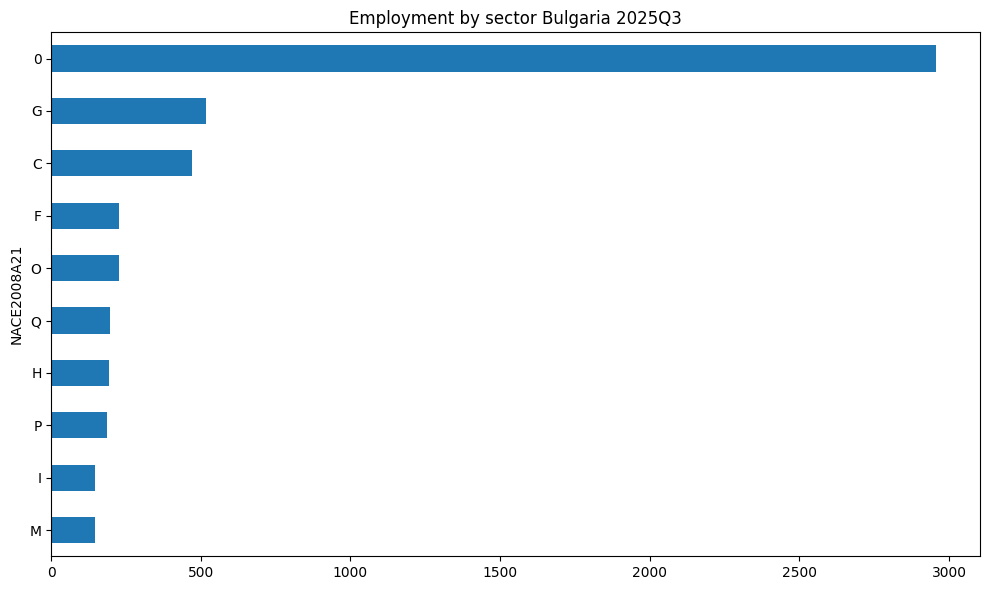

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
total.head(10).sort_values().plot(kind="barh")
plt.title(f"Employment by sector Bulgaria {last_period}")
plt.tight_layout()
plt.savefig("../reports/figures/nsi_top_sectors.png")
plt.show()

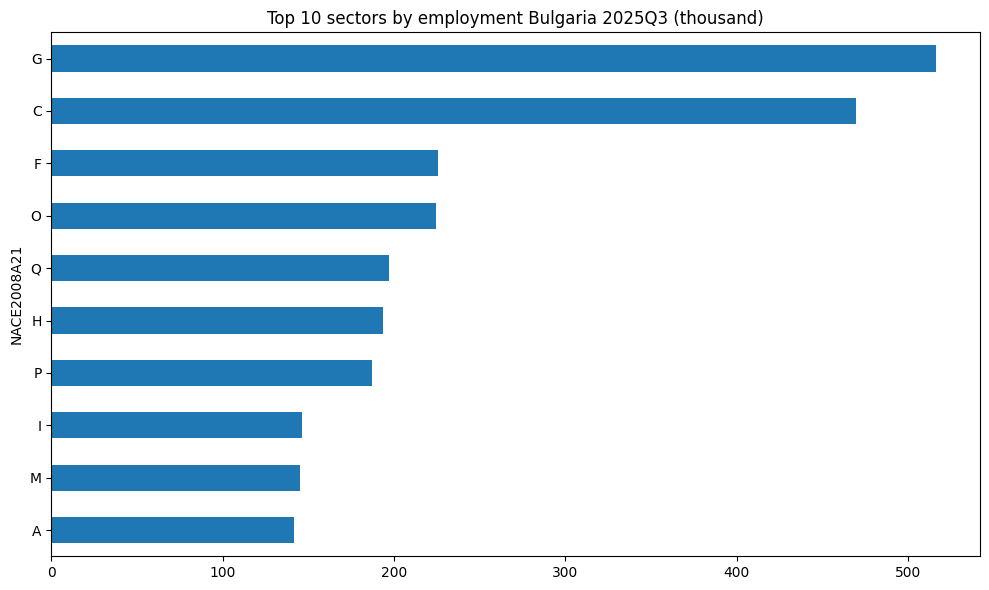

saved: reports/figures/nsi_top10_sectors_no_total.png
NACE2008A21
G    516.3
C    470.0
F    225.7
O    224.8
Q    197.4
H    193.5
P    187.2
I    146.5
M    145.1
A    141.8
Name: ValueColumn, dtype: float64


In [5]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("../data/raw/nsi_employment_by_sector.csv")
df["ValueColumn"] = pd.to_numeric(df["ValueColumn"], errors="coerce")

last_period = df["periods"].max()
df_last = df[(df["periods"] == last_period) & (df["GenderID"] == 0)].copy()

total = (
    df_last.groupby("NACE2008A21")["ValueColumn"]
    .sum()
    .sort_values(ascending=False)
)

total_no_total = total.drop(index="0", errors="ignore")

top10 = total_no_total.head(10)

plt.figure(figsize=(10,6))
top10.sort_values().plot(kind="barh")
plt.title(f"Top 10 sectors by employment Bulgaria {last_period} (thousand)")
plt.tight_layout()
plt.savefig("../reports/figures/nsi_top10_sectors_no_total.png")
plt.show()

print("saved: reports/figures/nsi_top10_sectors_no_total.png")
print(top10)


Project Bulgarian Labour Market Analysis
Source National Statistical Institute Bulgaria
Goal Employment trends by sector education region